In [ ]:
pip install keras_tuner

In [394]:
from pathlib import Path
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# %pip install scikit-learn
from sklearn.model_selection import train_test_split
from pathlib import Path
# %pip install matplotlib
import matplotlib.pyplot as plt
import glob
import random
from PIL import Image
import numpy as np

# Larger CNN Model
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Normalization
from keras.models import Model  # Import Model class
from keras.layers import Input, Dense, Flatten
from keras.optimizers import SGD  # Import optimizer if not already imported
from tensorflow.keras.layers import BatchNormalization
from sklearn import preprocessing
import tensorflow as tf
import keras_tuner as kt

In [360]:
pixel = 37

In [361]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/train', 
                                                                 color_mode='grayscale', 
                                                                 batch_size=10000,
                                                                 image_size=(pixel, pixel),
                                                                 seed = 42)

Found 9043 files belonging to 15 classes.


In [362]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/test',
                                                                color_mode='grayscale',
                                                                batch_size=10000,
                                                                image_size=(pixel, pixel),
                                                                seed = 42)

Found 3000 files belonging to 15 classes.


In [363]:
valdation_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/validation',
                                                                        color_mode='grayscale',
                                                                        batch_size=10000,
                                                                        image_size=(pixel, pixel),
                                                                        seed = 42)

Found 3000 files belonging to 15 classes.


In [364]:
for image, label in train_data:
    X_train = image
    y_train = label

X_train = X_train/255
y_train = to_categorical(y_train,15)

In [365]:
for image, label in test_data:
    X_test = image
    y_test = label

X_test = X_test/255
y_test = to_categorical(y_test,15)

In [366]:
for image, label in valdation_data:
    X_validate = image
    y_validate = label

X_validate = X_validate/255
y_validate = to_categorical(y_validate,15)

In [367]:
print(X_validate.shape)
print(X_test.shape)
print(X_train.shape)    
print(y_train.shape)

(3000, 37, 37, 1)
(3000, 37, 37, 1)
(9043, 37, 37, 1)
(9043, 15)


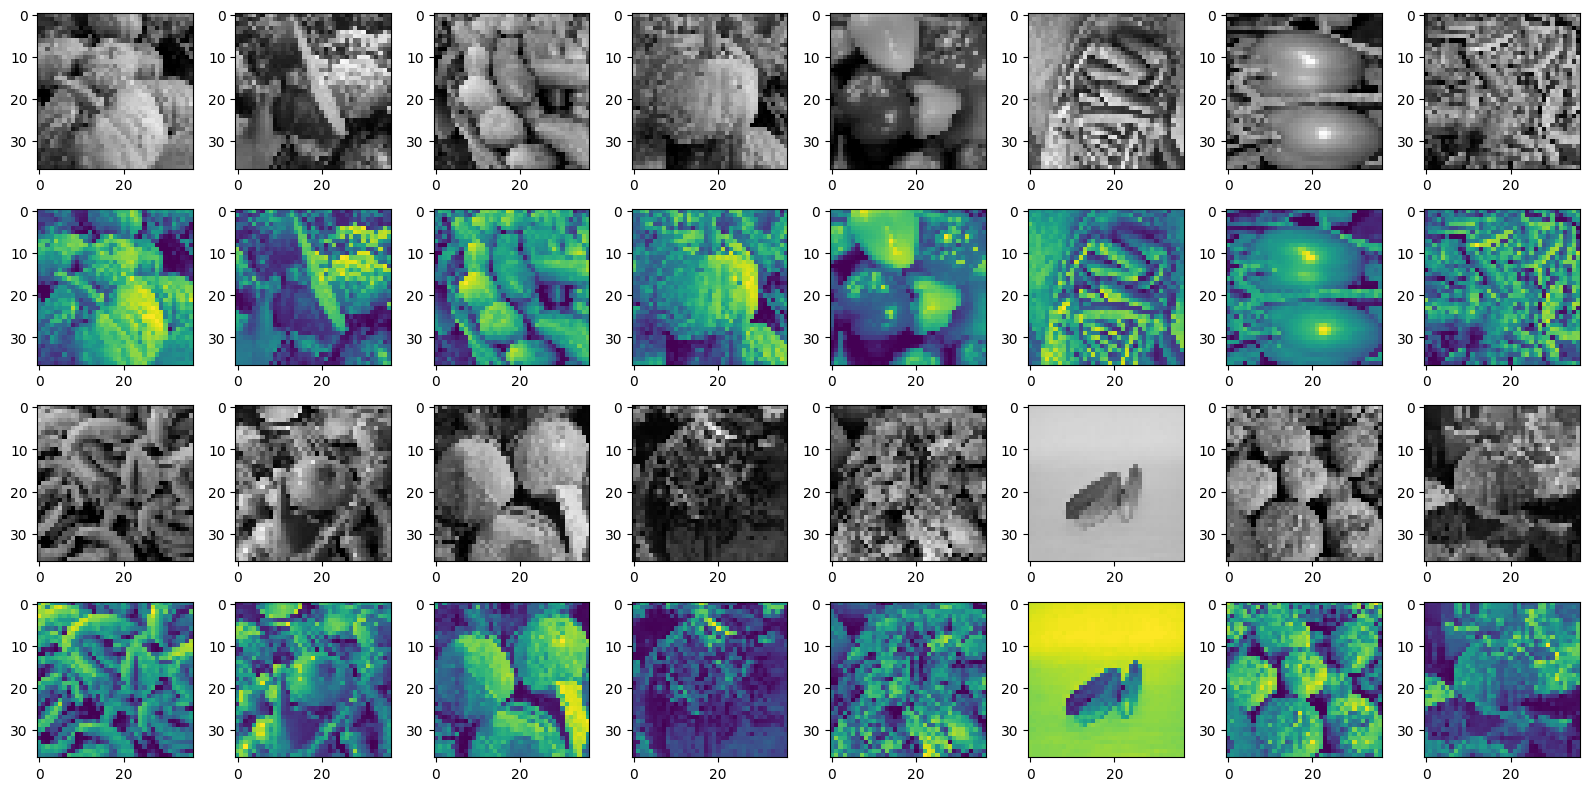

In [368]:
rows = 2 # defining number of rows in figure
cols = 8 # defining number of colums in figure

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows*2,cols,(2*i*cols)+(j+1))
        plt.imshow(tf.image.grayscale_to_rgb(X_train[i*cols + j]))
        plt.axis("on")

    for j in range(cols):
        f.add_subplot(rows*2,cols,((2*i+1)*cols) +(j+1))
        plt.imshow(X_train[i*cols + j])
        plt.axis("on")

plt.tight_layout()
plt.show()

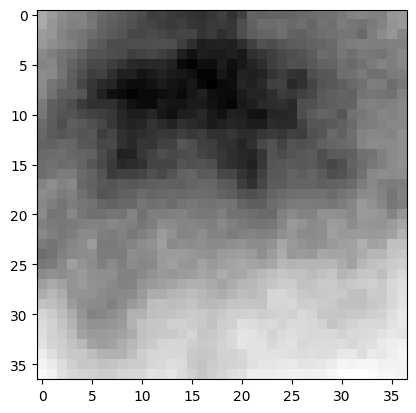

In [369]:
plt.imshow(np.mean(X_train, axis=0), cmap='Greys')
plt.show()

<Axes: >

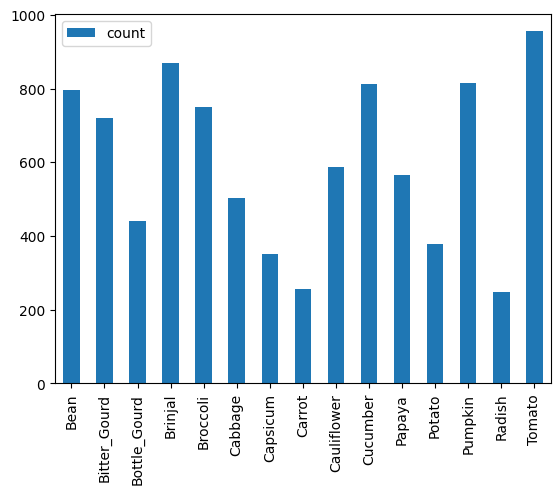

In [370]:
import pandas as pd
images_length={}
for i, cat in enumerate(os.listdir('./Dataset for CA1 part A - AY2425S1/train')):
        
        # Load images for the ith category
        image_path = "./Dataset for CA1 part A - AY2425S1/train" + '/' + cat
        images_in_folder = os.listdir(image_path)
        images_length[cat]=len(images_in_folder)
        
pd.DataFrame(images_length,index = ['count']).T.plot(kind='bar')

<h1>Utility Functions / Variable</h1>
<br>
<h1>Learning Curve Plotting Function</h1>

In [371]:
def plot_loss_curve(history):
    history = pd.DataFrame(history)
    epochs = list(range(1, len(history) + 1))
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    plt.title("Plot Loss Curve")
    # plt.scatter(epochs, history["loss"])
    # plt.plot(epochs, history["loss"], label="Training Loss")
    plt.scatter(epochs, history["val_loss"])
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    # plt.scatter(epochs, history["accuracy"])
    # plt.plot(epochs, history["accuracy"], label="Training Accuracy")
    plt.scatter(epochs, history["val_accuracy"])
    plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

<h1>BaseLine Model</h1>

In [372]:
num_classes = y_test.shape[1]

In [373]:
# create model
model = Sequential()
model.add(Dense(128, input_shape=(37,37,1), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', 
 metrics=['accuracy'])

model.summary()

Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_389 (Dense)           (None, 37, 37, 128)       256       
                                                                 
 flatten_132 (Flatten)       (None, 175232)            0         
                                                                 
 dense_390 (Dense)           (None, 64)                11214912  
                                                                 
 dense_391 (Dense)           (None, 15)                975       
                                                                 
Total params: 11,216,143
Trainable params: 11,216,143
Non-trainable params: 0
_________________________________________________________________


In [374]:
# Fit the model
train_history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=50, batch_size=200, verbose=0)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

94/94 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.4173
CNN Error: 58.27%


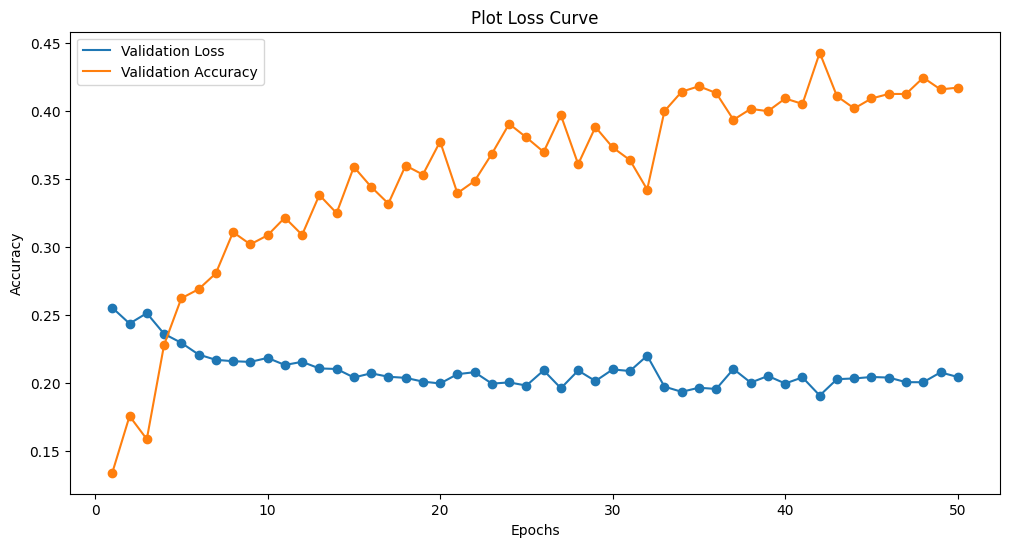

In [375]:
plot_loss_curve(train_history.history)

<H1>Data Augmentation</H1>

In [376]:
IMG_SIZE = (37, 37, 1)

In [377]:
def data_augmentation(x_train):
    imageArr = []
    for images in x_train:
        images = images.reshape(37, 37, 1)
        image = tf.image.random_flip_left_right(images)
        image = tf.image.resize_with_crop_or_pad(
            image, IMG_SIZE[0] + 4, IMG_SIZE[1])
        image = tf.image.random_crop(
            image, size=IMG_SIZE
        )
        imageArr.append(tf.reshape(image, (37, 37)))
    return np.array(imageArr)

In [378]:
X_train_aug = np.copy(X_train)

In [379]:
X_train_aug = data_augmentation(X_train_aug)

In [380]:
X_train_aug.shape

(9043, 37, 37)

In [381]:
# X_train_aug = X_train_aug/255

In [382]:
print(X_train_aug.shape)

(9043, 37, 37)


In [383]:
class_labels = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}

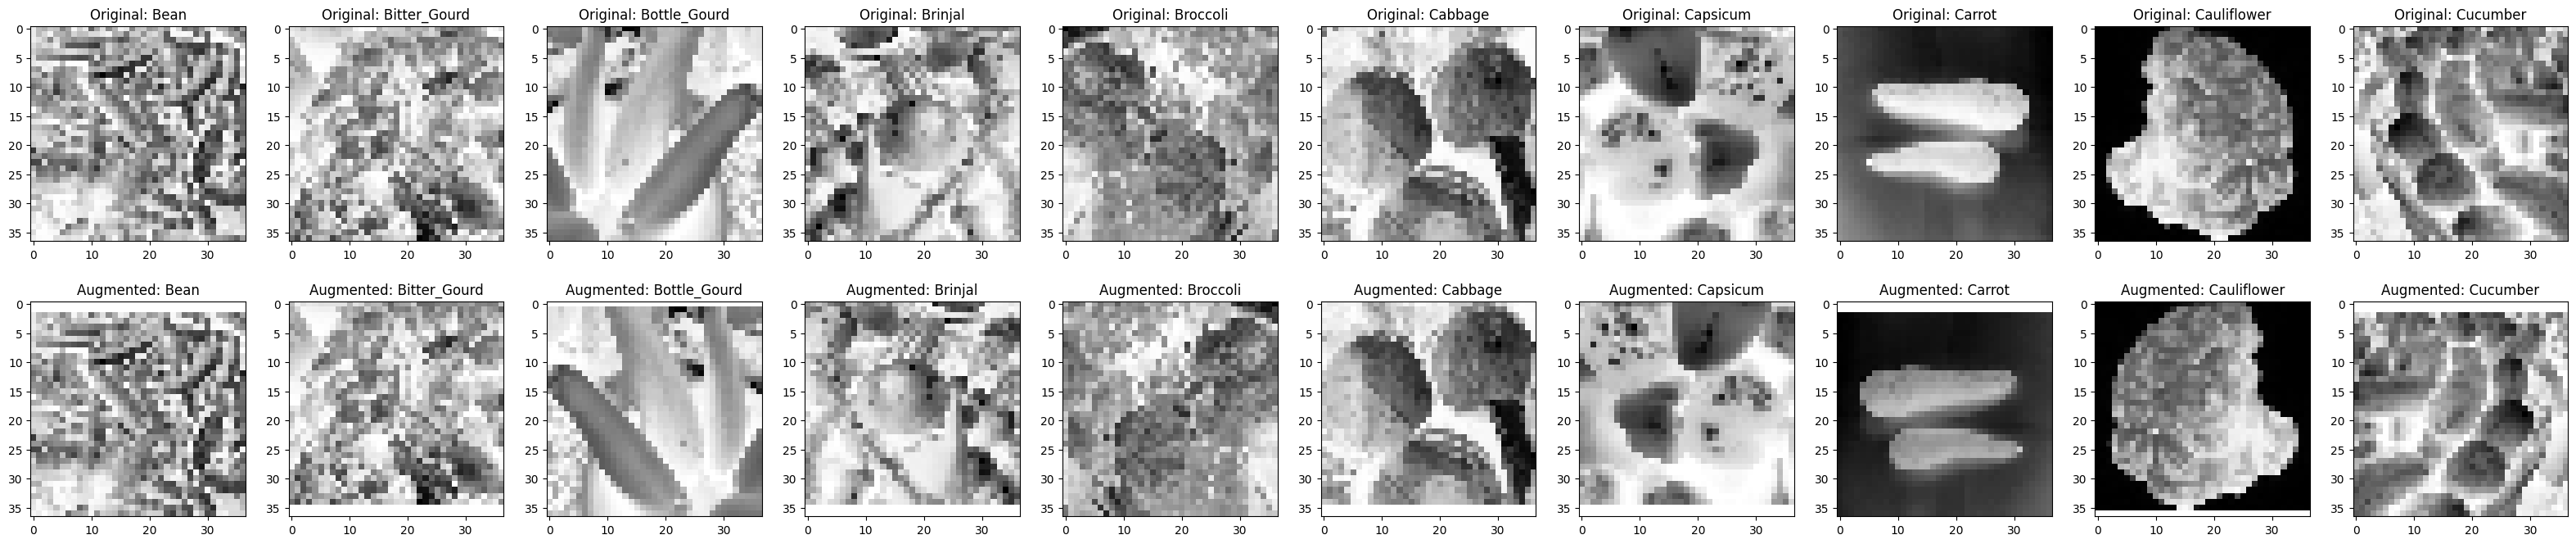

In [384]:
fig, ax = plt.subplots(2, 10, figsize=(40, 8))
for idx in range(20):
    subplot = ax.ravel()[idx]
    y_label = np.argmax(y_train, axis=1)
    if idx >= 10:
        subplot.set_title(f"Augmented: {class_labels[idx % 10]}")
        subplot.imshow(X_train_aug[y_label == idx % 10][0], cmap='Greys')
    else:
        subplot.set_title(f"Original: {class_labels[idx % 10]}")
        subplot.imshow(X_train[y_label == idx % 10][0], cmap='Greys')
    subplot.axis("on")
plt.show()

<h2>Conv2D Model</h2>

<hr>
Without Augmented Data

Ref : https://www.geeksforgeeks.org/keras-conv2d-class/


<ol>
<li>kernel_size : This parameter determines the dimensions of the kernel. Common dimensions include 1×1, 3×3, 5×5, and 7×7 which can be passed as (1, 1), (3, 3), (5, 5), or (7, 7) tuples.
It is an integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
This parameter must be an odd integer.</li>
</ol>

In [385]:
def conv2D_Model(x_train,loss_type,activation_type):
    conv2D = Sequential()

    conv2D.add(Conv2D(32,(5,5), padding="same", activation='relu',input_shape = X_train.shape[1:]))
    conv2D.add(MaxPooling2D(pool_size=(2,2)))

    conv2D.add(Conv2D(64,(1, 1), activation=activation_type))
    conv2D.add(MaxPooling2D(pool_size=(2, 2)))

    conv2D.add(Dropout(0.2))
    conv2D.add(Flatten())

    conv2D.add(BatchNormalization())

    conv2D.add(Dense(128, activation = activation_type)) 
    conv2D.add(Dense(64, activation = activation_type)) 

    conv2D.add(Dense(num_classes, activation ='softmax')) 

    conv2D.compile(loss=loss_type,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=['accuracy'])

    mon_val_acc = EarlyStopping(monitor='val_accuracy', patience=15)
    mon_val_loss = EarlyStopping(monitor='val_loss', patience=15)

    train_history = conv2D.fit(x_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=200, verbose=1, callbacks = mon_val_loss)

    # Final evaluation of the model
    scores = conv2D.evaluate(X_test, y_test)
    print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

    plot_loss_curve(train_history.history)

    return train_history,loss_type,activation_type

Epoch 1/100
46/46 [==============================] - 1s 11ms/step - loss: 2.7065 - accuracy: 0.1032 - val_loss: 2.7009 - val_accuracy: 0.0740
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 2.5071 - accuracy: 0.1888 - val_loss: 2.6827 - val_accuracy: 0.1393
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 2.3352 - accuracy: 0.2679 - val_loss: 2.6488 - val_accuracy: 0.2297
Epoch 4/100
46/46 [==============================] - 0s 8ms/step - loss: 2.1573 - accuracy: 0.3296 - val_loss: 2.5953 - val_accuracy: 0.2523
Epoch 5/100
46/46 [==============================] - 0s 8ms/step - loss: 2.0047 - accuracy: 0.3863 - val_loss: 2.5369 - val_accuracy: 0.3257
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 1.8508 - accuracy: 0.4441 - val_loss: 2.4307 - val_accuracy: 0.3560
Epoch 7/100
46/46 [==============================] - 0s 8ms/step - loss: 1.7240 - accuracy: 0.4793 - val_loss: 2.3001 - val_accuracy: 0.3960
Epoch 8/100


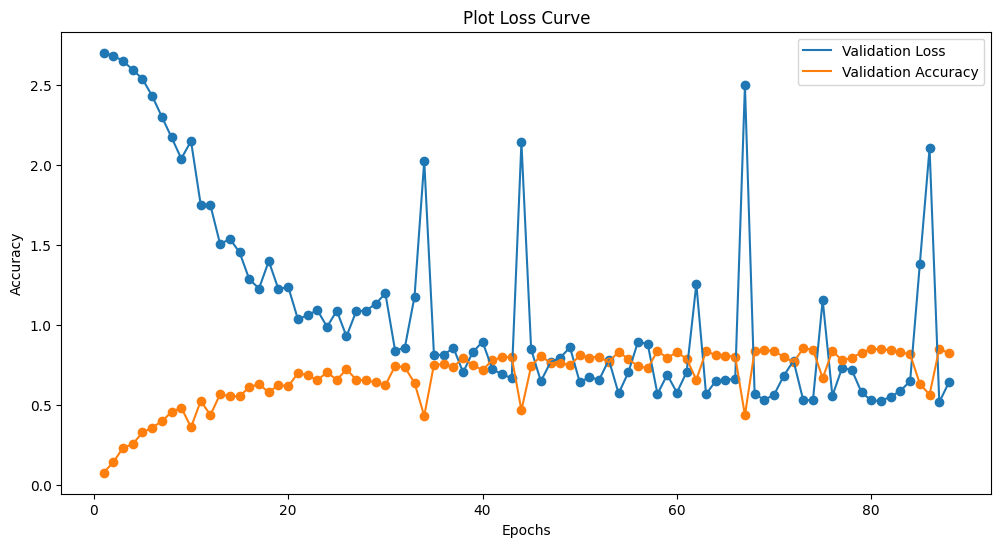

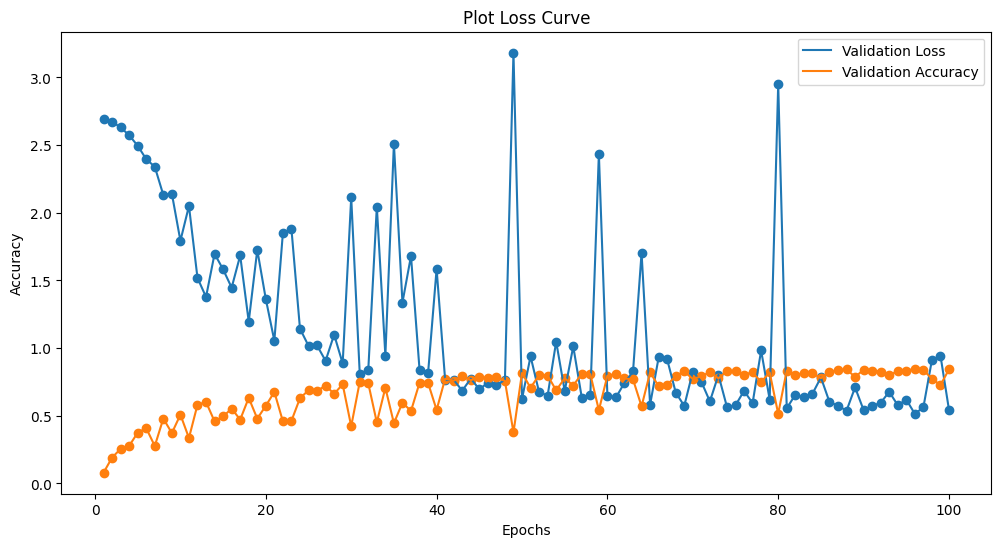

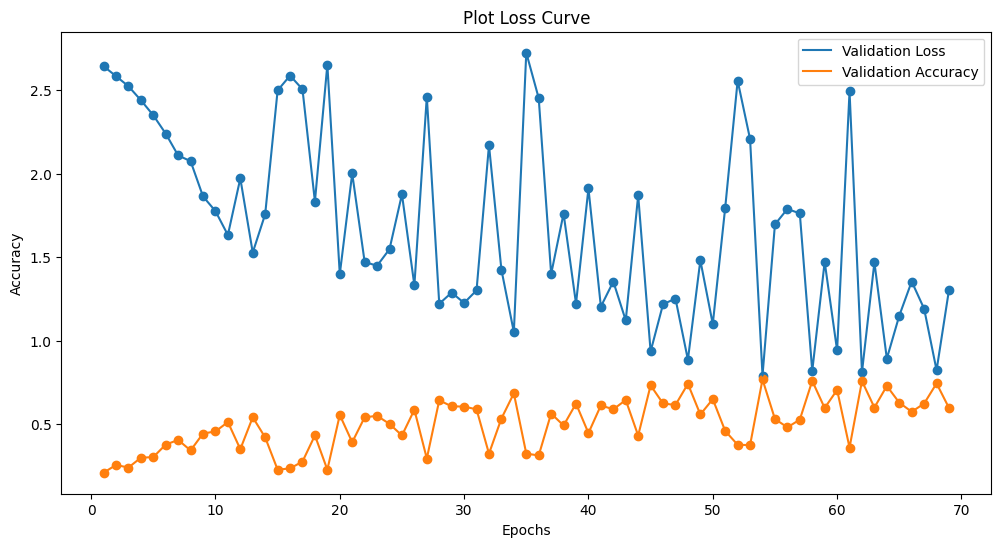

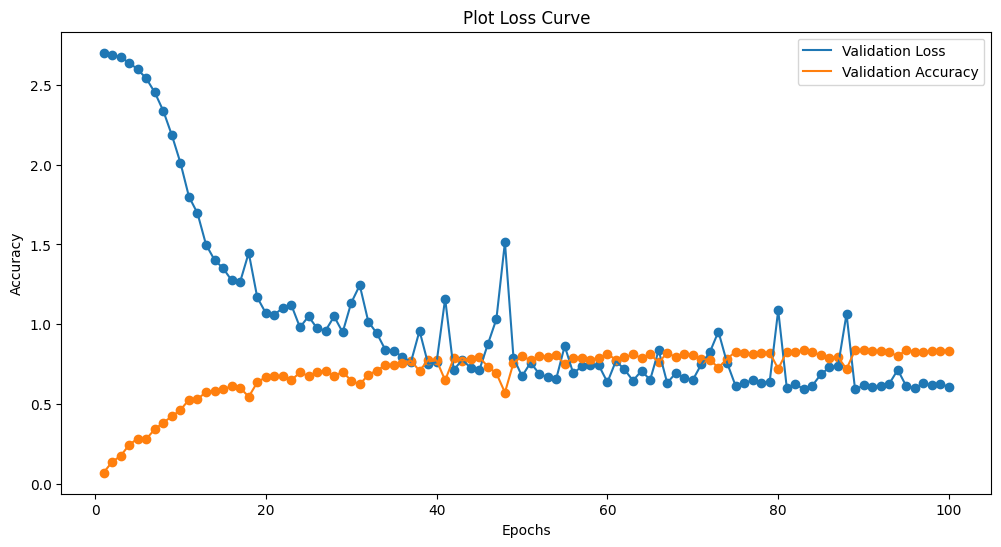

In [386]:
loss = [tf.keras.losses.categorical_crossentropy]
activation = ['relu','leaky_relu','tanh','gelu']
for i in loss:
    for x in activation:
        Model_Hist,Loss,Activation = conv2D_Model(X_train,i,x)
        histories.append((Model_Hist,Loss,Activation))

In [387]:
# for history_info in histories:
#     print(f'Activation: {history_info[2]} \nLoss: {str(history_info[1])}\n')
#     print(history_info[0].history)
#     print("-" * 225)

Epoch 1/100
46/46 [==============================] - 1s 11ms/step - loss: 2.6960 - accuracy: 0.1227 - val_loss: 2.6996 - val_accuracy: 0.0987
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 2.5087 - accuracy: 0.1951 - val_loss: 2.6841 - val_accuracy: 0.1327
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 2.3619 - accuracy: 0.2480 - val_loss: 2.6540 - val_accuracy: 0.1777
Epoch 4/100
46/46 [==============================] - 0s 9ms/step - loss: 2.2154 - accuracy: 0.3016 - val_loss: 2.6144 - val_accuracy: 0.2347
Epoch 5/100
46/46 [==============================] - 0s 8ms/step - loss: 2.0935 - accuracy: 0.3397 - val_loss: 2.5557 - val_accuracy: 0.2480
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 1.9850 - accuracy: 0.3723 - val_loss: 2.5010 - val_accuracy: 0.2763
Epoch 7/100
46/46 [==============================] - 0s 8ms/step - loss: 1.8860 - accuracy: 0.4083 - val_loss: 2.4291 - val_accuracy: 0.2953
Epoch 8/100


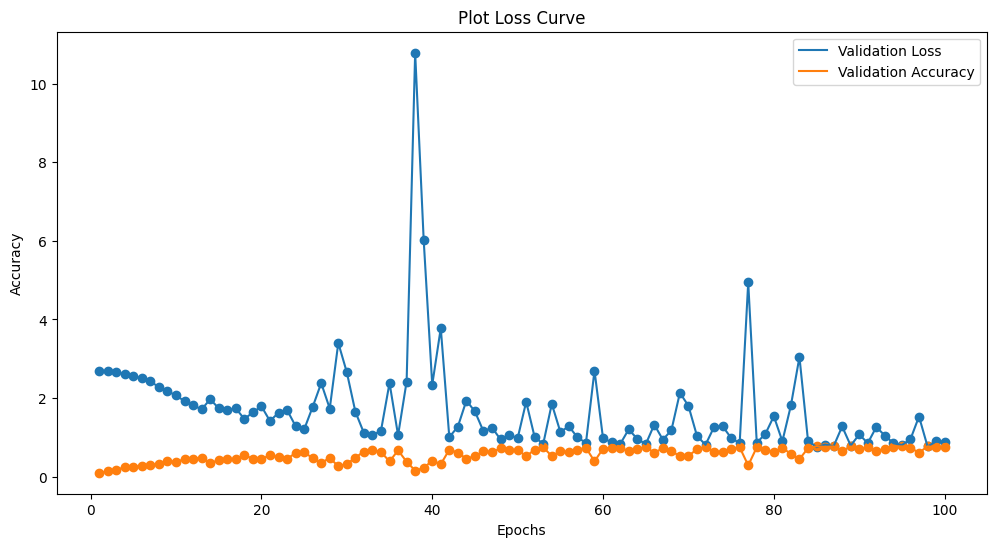

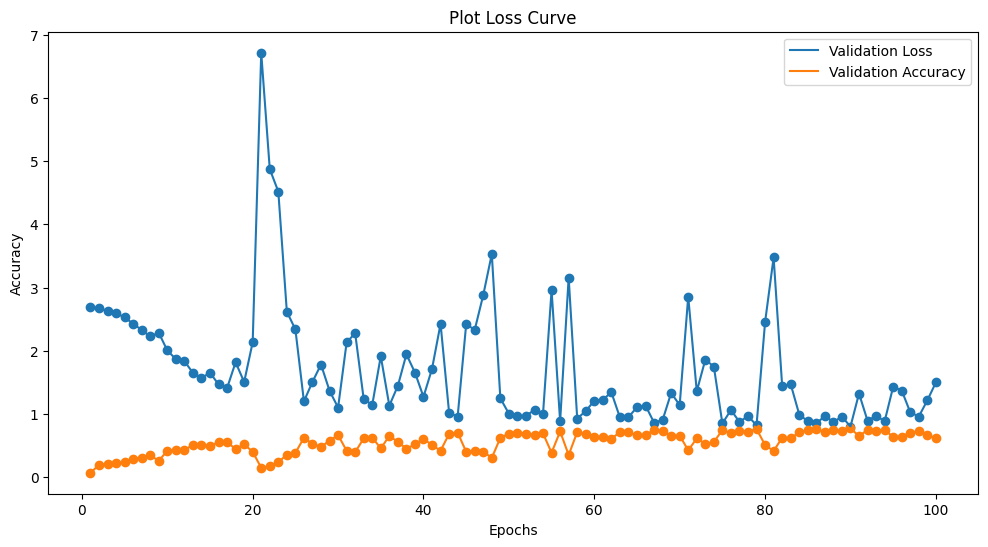

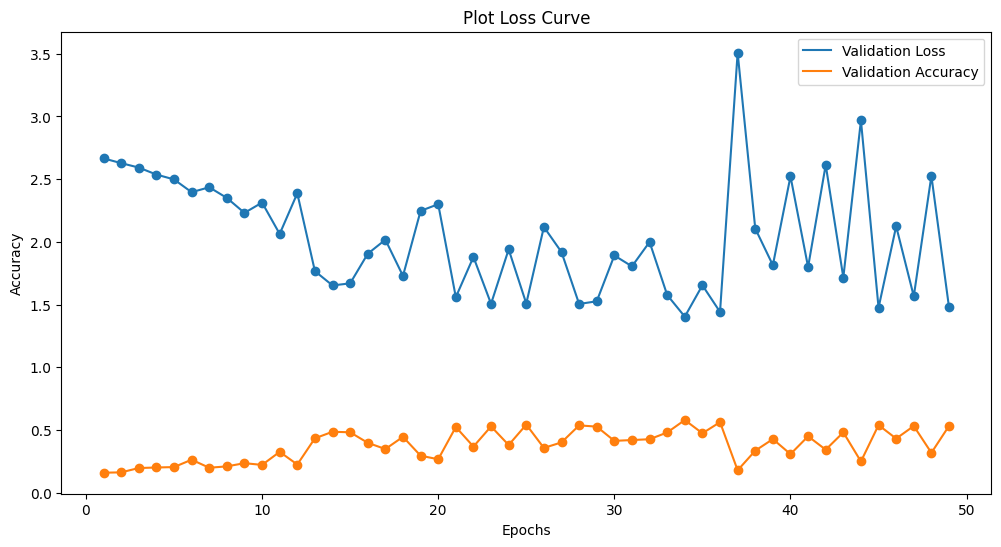

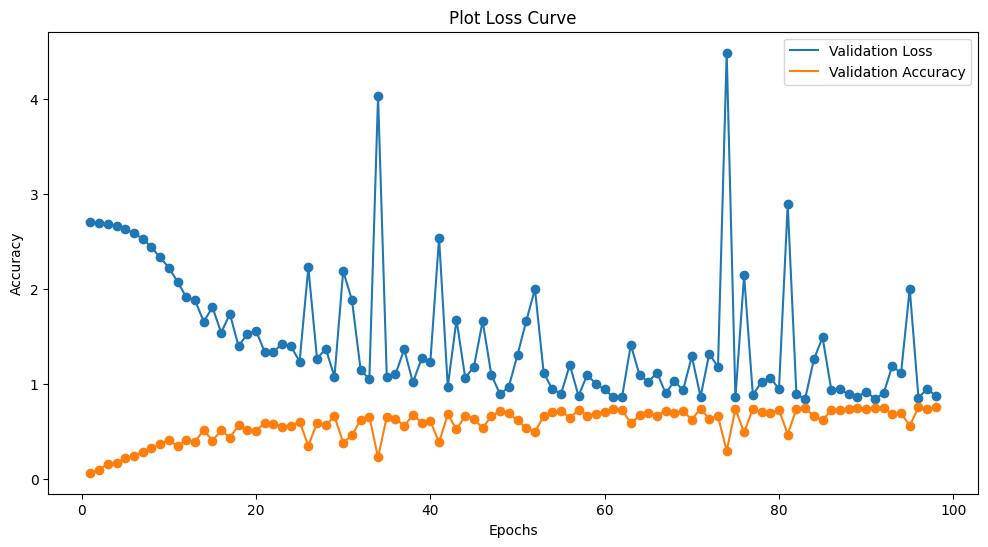

In [388]:
loss = [tf.keras.losses.categorical_crossentropy]
activation = ['relu','leaky_relu','tanh','gelu']
for i in loss:
    for x in activation:
        Model_Hist,Loss,Activation = conv2D_Model(X_train_aug,i,x)
        histories.append((Model_Hist,Loss,Activation))

In [408]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(37, 37)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model


In [409]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='intro_to_kt')

Reloading Tuner from .\intro_to_kt\tuner0.json


In [410]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [415]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_validate, y_validate))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Traceback (most recent call last):
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *arg

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\data_adapter.py", line 799, in _validate_args
    raise ValueError(
ValueError: `y` argument is not supported when using dataset as input.


In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=2,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search_space_summary()
tuner.search(X_train, y_train, epochs=20, validation_data=(X_validate, y_validate))

best_hp = tuner.get_best_hyperparameters()[0]

model = tuner.hypermodel.build(best_hp)

summary = tuner.results_summary(num_trials=10)